In [1]:
# Adapted from the OcamCalib Undistortion and OmniCV libraries
# https://github.com/matsuren/ocamcalib_undistort
# https://github.com/kaustubh-sadekar/OmniCV-Lib/tree/master/omnicv

In [2]:
import numpy as np
import cv2
from ocamcamera import OcamCamera
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)
%matplotlib inline

pol: [-511.5782, 0.0, 0.003372776, -8.278581e-06, 7.619332e-09]
invpol: [649.991672, 287.534348, -111.666605, 106.98016, -18.266759, 16.182228, 171.990321, -603.301599, 10.751534, 1631.694329, -430.912397, -2456.614731, 504.033328, 2378.066114, -94.821908, -1445.350164, -218.741363, 486.074528, 168.120278, -58.594662, -37.798323, -5.072244]
xc(col dir): 699.0, 	yc(row dir): 699.0 in Ocam coord
affine: [1.0, 0.0, 0.0]
img_size: (1400, 1400)
fov: 180

Image size:  (1400, 1400, 3)


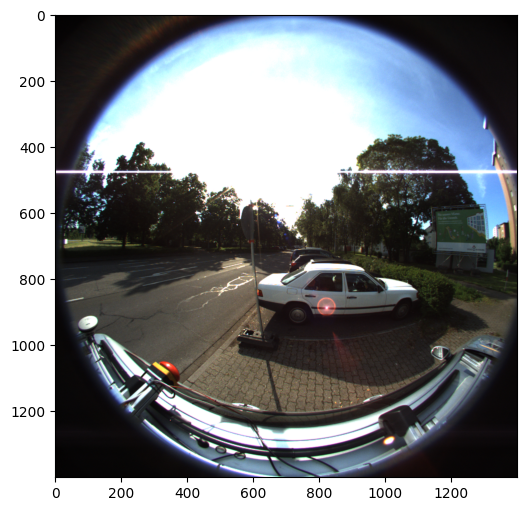

In [3]:
# Left fisheye camera
calib_file_cam02 = 'calib_files/calib_results_02_1.txt'
ocam_02 = OcamCamera(calib_file_cam02, fov=180)
print(ocam_02)

img2 = cv2.imread('/home/angelika/pixelsplat_fisheye/datasets/kitti360/test_images_cam02_0_99/0000000000.png')[:,:,::-1]
print('\nImage size: ', img2.shape)
plt.imshow(img2)

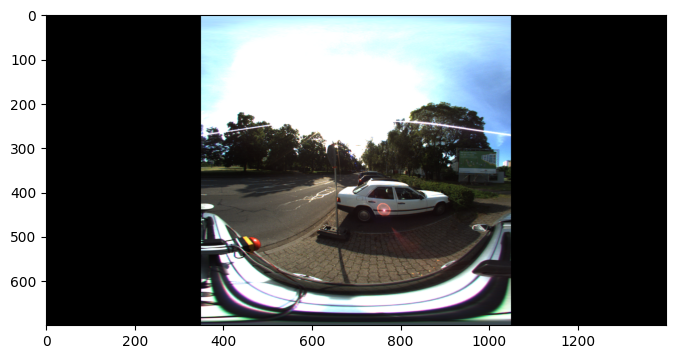

In [4]:
# Fisheye to equirectangular projection
W = 1400
H = 700
th = np.pi/H
p = 2*np.pi/W
phi = [-np.pi + (i + 0.5)*p for i in range(W)]
theta = [-np.pi/2 + (i + 0.5)*th for i in range(H)]
phi_xy, theta_xy  = np.meshgrid(phi, theta, sparse=False, indexing='xy')
point3D = np.stack([np.sin(phi_xy)*np.cos(theta_xy), np.sin(theta_xy), np.cos(phi_xy)*np.cos(theta_xy)]).reshape(3, -1)
mapx, mapy = ocam_02.world2cam(point3D)
mapx = mapx.reshape(H, W)
mapy = mapy.reshape(H, W)
out2 = cv2.remap(img2, mapx, mapy, cv2.INTER_LINEAR)
plt.imshow(out2)

In [5]:
# Equirectangular to perspective projection
# From https://github.com/kaustubh-sadekar/OmniCV-Lib/blob/master/Examples/equirect2persp.py

from omnicv import fisheyeImgConv

equiRect2 = out2

outShape = [350, 350]
inShape = equiRect2.shape[:2]
mapper = fisheyeImgConv()

FOV = 90
Theta = 0
Phi = 0
Hd = outShape[0]
Wd = outShape[1]
persp2 = mapper.eqruirect2persp(equiRect2, FOV, Theta, Phi, Hd, Wd)
plt.imshow(persp2)

AttributeError: module 'numpy' has no attribute 'float'

In [6]:
# Save images for video
for i, theta in enumerate(np.arange(-60, 60)):
    Theta = theta
    Phi = 0
    # persp2 = mapper.eqruirect2persp(equiRect2, FOV, Theta, Phi, Hd, Wd)
    
    # cv2.imwrite(f"fisheye_proj_02/video_0000001864/{i}.png", persp2)
    # # Then: ffmpeg -framerate 20 -i fisheye_proj_02/video_0000001864/%d.png out_1864.mp4


pol: [-511.5782, 0.0, 0.003372776, -8.278581e-06, 7.619332e-09]
invpol: [649.991672, 287.534348, -111.666605, 106.98016, -18.266759, 16.182228, 171.990321, -603.301599, 10.751534, 1631.694329, -430.912397, -2456.614731, 504.033328, 2378.066114, -94.821908, -1445.350164, -218.741363, 486.074528, 168.120278, -58.594662, -37.798323, -5.072244]
xc(col dir): 699.0, 	yc(row dir): 699.0 in Ocam coord
affine: [1.0, 0.0, 0.0]
img_size: (1400, 1400)
fov: 180
Image size:  (1400, 1400, 3)


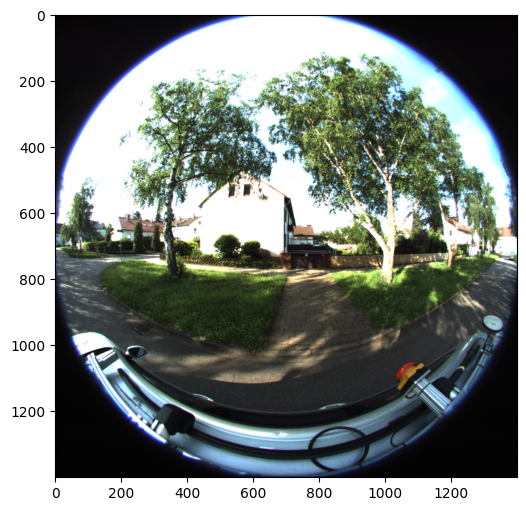

In [7]:
# Right fisheye camera
calib_file_cam03 = 'calib_files/calib_results1.txt'
ocam_03 = OcamCamera(calib_file_cam03, fov=180)
print(ocam_03)

img3 = cv2.imread('image_03/0000001864.png')[:,:,::-1]
print('Image size: ', img3.shape)
plt.imshow(img3)

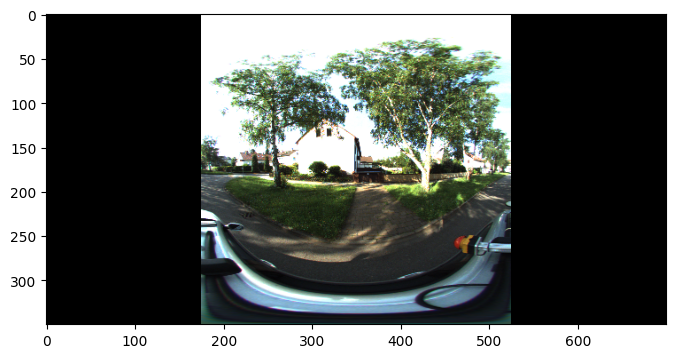

In [8]:
# Fisheye to equirectangular projection
W = 700
H = 350
th = np.pi/H
p = 2*np.pi/W
phi = [-np.pi + (i + 0.5)*p for i in range(W)]
theta = [-np.pi/2 + (i + 0.5)*th for i in range(H)]
phi_xy, theta_xy  = np.meshgrid(phi, theta, sparse=False, indexing='xy')
point3D = np.stack([np.sin(phi_xy)*np.cos(theta_xy), np.sin(theta_xy), np.cos(phi_xy)*np.cos(theta_xy)]).reshape(3, -1)
mapx, mapy = ocam_03.world2cam(point3D)
mapx = mapx.reshape(H, W)
mapy = mapy.reshape(H, W)
out3 = cv2.remap(img3, mapx, mapy, cv2.INTER_LINEAR)
plt.imshow(out3)

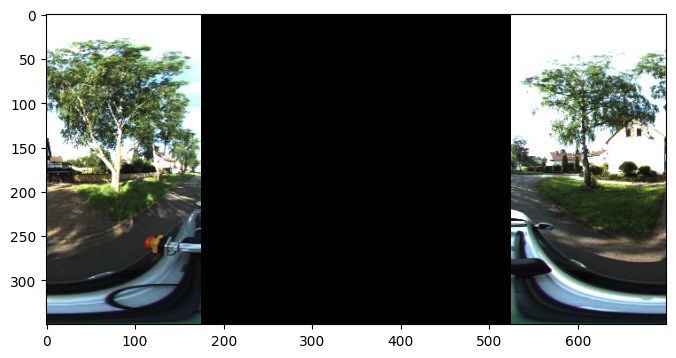

In [9]:
# Fisheye to equirectangular projection
W = 700
H = 350
th = np.pi/H
p = 2*np.pi/W
phi = [-2*np.pi + (i + 0.5)*p for i in range(W)]
theta = [-np.pi/2 + (i + 0.5)*th for i in range(H)]
phi_xy, theta_xy  = np.meshgrid(phi, theta, sparse=False, indexing='xy')
point3D = np.stack([np.sin(phi_xy)*np.cos(theta_xy), np.sin(theta_xy), np.cos(phi_xy)*np.cos(theta_xy)]).reshape(3, -1)
mapx, mapy = ocam_03.world2cam(point3D)
mapx = mapx.reshape(H, W)
mapy = mapy.reshape(H, W)
out3 = cv2.remap(img3, mapx, mapy, cv2.INTER_LINEAR)
plt.imshow(out3)

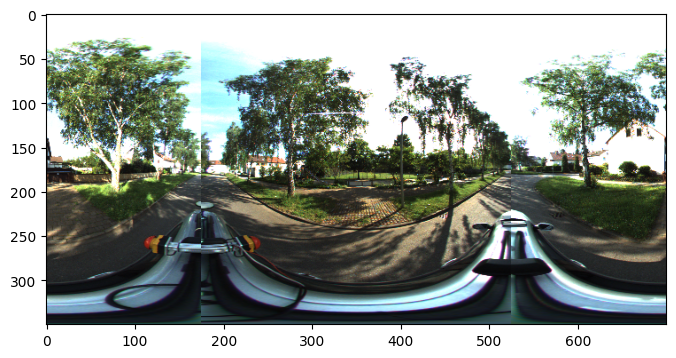

In [10]:
out_dual = out2 + out3
plt.imshow(out_dual)

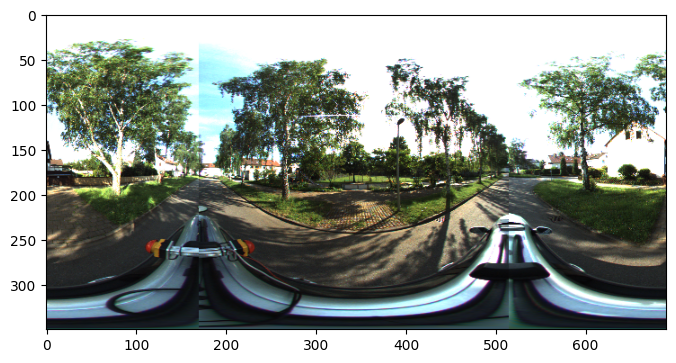

In [11]:
out_dual_sync = out_dual.copy()
out_dual_sync[:, 10:180, :] = out_dual[:, 0:170, :]
out_dual_sync[:, 0:9, :] = 0
out_dual_sync = out_dual_sync[:, 10:, :]
plt.imshow(out_dual_sync)

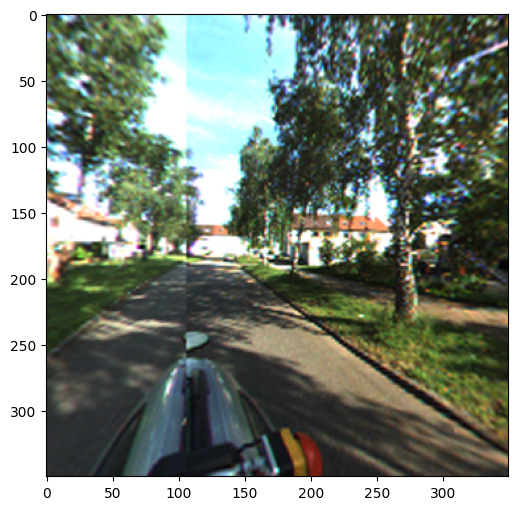

In [12]:
equiRect_dual = out_dual_sync

outShape = [350, 350]
inShape = equiRect_dual.shape[:2]

FOV = 90
Theta = -70
Phi = 0
Hd = outShape[0]
Wd = outShape[1]
persp_dual = mapper.eqruirect2persp(equiRect_dual, FOV, Theta, Phi, Hd, Wd)
plt.imshow(persp_dual)

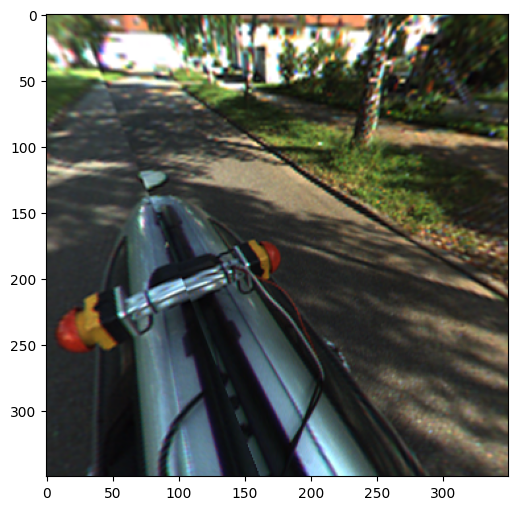

In [13]:
equiRect_dual = out_dual_sync

outShape = [350, 350]
inShape = equiRect_dual.shape[:2]

FOV = 90
Theta = -60
Phi = -40
Hd = outShape[0]
Wd = outShape[1]
persp_dual = mapper.eqruirect2persp(equiRect_dual, FOV, Theta, Phi, Hd, Wd)
plt.imshow(persp_dual)

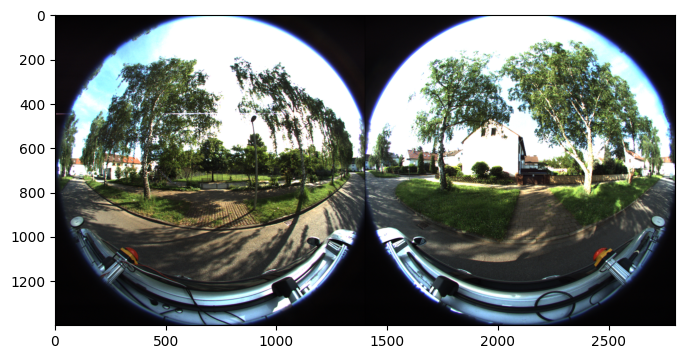

In [33]:
dual_fisheye = np.concatenate([img2, img3], axis=1)
plt.imshow(dual_fisheye)

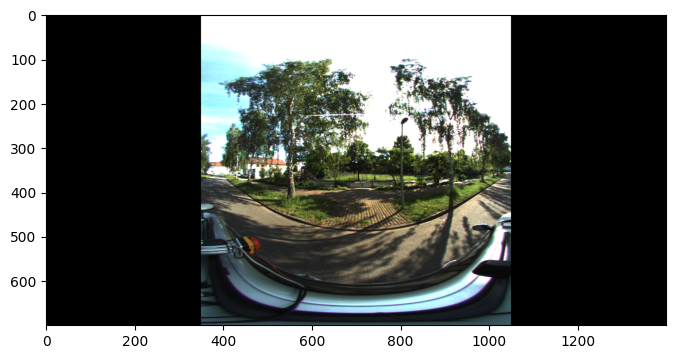

In [11]:
# Fisheye to equirectangular projection
W = 1400
H = 700
th = np.pi/H
p = 2*np.pi/W
phi = [-np.pi + (i + 0.5)*p for i in range(W)]
theta = [-np.pi/2 + (i + 0.5)*th for i in range(H)]
phi_xy, theta_xy  = np.meshgrid(phi, theta, sparse=False, indexing='xy')
point3D = np.stack([np.sin(phi_xy)*np.cos(theta_xy), np.sin(theta_xy), np.cos(phi_xy)*np.cos(theta_xy)]).reshape(3, -1)
mapx, mapy = ocam_02.world2cam(point3D)
mapx = mapx.reshape(H, W)
mapy = mapy.reshape(H, W)
out_dual = cv2.remap(dual_fisheye, mapx, mapy, cv2.INTER_LINEAR)
plt.imshow(out_dual)